In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import metrics

In [48]:
traindata = pd.read_csv("LC_TrainingData2020.csv")
testdata = pd.read_csv("LC_TestData_2020.csv")

In [49]:
traindata.head(10)

,loan_amnt,term,installment,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec
0,14400,60 months,291.92,Senior Director,9.0,MORTGAGE,135000.0,Not Verified,Current,Home improvement,070xx,NJ,6.60,1,Oct.99,0,11.0,NaN,15,0
1,4500,36 months,151.06,Lead machine operator,6.0,RENT,32000.0,Not Verified,Current,Credit card refinancing,531xx,WI,29.93,0,Apr.11,1,NaN,NaN,7,0
2,3600,36 months,118.53,IT Specialist 6,11.0,RENT,89712.0,Not Verified,Current,Credit card refinancing,984xx,WA,20.30,0,Aug.94,0,NaN,NaN,16,0
3,7000,36 months,210.81,Nurse,2.0,RENT,85000.0,Not Verified,Current,Debt consolidation,112xx,NY,12.80,1,Feb.92,0,20.0,30.0,14,1
4,39000,36 months,1370.94,Lead ultrasound technologist,19.0,MORTGAGE,78000.0,Source Verified,Current,Debt consolidation,453xx,OH,33.14,0,May.00,0,NaN,NaN,17,0
5,20000,36 months,712.96,teacher,11.0,MORTGAGE,63000.0,Not Verified,Current,Debt consolidation,011xx,MA,29.03,1,marras.90,2,23.0,71.0,15,1
6,8000,36 months,250.66,Techniti,20.0,MORTGAGE,57000.0,Source Verified,Fully Paid,Credit card refinancing,666xx,KS,28.45,3,Oct.96,0,7.0,NaN,7,0
7,9300,36 months,292.46,Banquet server,9.0,MORTGAGE,62000.0,Source Verified,Current,Debt consolidation,481xx,MI,16.12,0,Jun.03,1,71.0,99.0,14,1
8,18000,36 months,563.98,Equipment Management,2.0,MORTGAGE,60000.0,Not Verified,Current,Debt consolidation,329xx,FL,30.76,0,Oct.00,0,NaN,NaN,13,0
9,5000,36 months,162.49,driver,11.0,RENT,75000.0,Not Verified,Current,Other,891xx,NV,11.01,0,Oct.90,1,NaN,74.0,4,1


In [50]:
testdata.head(10)

,loan_amnt,term,int_rate,installment,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec
0,15000,36 months,5.32%,451.73,Executive Account Manager,16.0,MORTGAGE,182000.0,Not Verified,Current,...,751xx,TX,9.35,0,Nov.74,0,NaN,NaN,13,0
1,17000,36 months,7.49%,528.73,Air Traffic Controller,20.0,MORTGAGE,120000.0,Not Verified,Fully Paid,...,840xx,UT,8.41,0,Oct.05,0,72.0,89.0,9,1
2,20000,36 months,5.32%,602.30,Associate Dentist,3.0,RENT,120000.0,Not Verified,Current,...,926xx,CA,26.54,0,Aug.02,1,NaN,NaN,18,0
3,16000,60 months,12.74%,361.93,claims analyst,19.0,MORTGAGE,130000.0,Not Verified,Current,...,577xx,SD,8.28,0,Jul.95,0,42.0,79.0,16,1
4,2000,36 months,16.99%,71.30,Supervisor,6.0,MORTGAGE,62000.0,Not Verified,Current,...,983xx,WA,16.43,0,Oct.07,2,57.0,44.0,10,2
5,11875,36 months,11.44%,391.26,Shop foreman,19.0,MORTGAGE,55000.0,Not Verified,Current,...,480xx,MI,34.50,0,Apr.97,0,75.0,NaN,14,0
6,5000,36 months,14.99%,173.31,Lead Supervisor,17.0,RENT,68000.0,Not Verified,Fully Paid,...,945xx,CA,22.50,0,Apr.03,0,27.0,NaN,6,0
7,14400,36 months,12.74%,483.40,NaN,0.0,MORTGAGE,61000.0,Verified,Current,...,864xx,AZ,14.24,0,Dec.89,0,41.0,NaN,10,0
8,6800,36 months,13.49%,230.73,Mechanic,0.5,RENT,55000.0,Not Verified,Current,...,908xx,CA,20.73,0,Dec.06,1,NaN,NaN,9,0
9,13000,36 months,6.99%,401.35,Mold Maker,20.0,MORTGAGE,120000.0,Source Verified,Current,...,600xx,IL,8.30,0,Dec.97,0,42.0,NaN,11,0


In [51]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103514 entries, 0 to 103513
Data columns (total 20 columns):
loan_amnt                 103514 non-null int64
term                      103514 non-null object
installment               103514 non-null float64
emp_title                 96491 non-null object
emp_length                103514 non-null float64
home_ownership            103514 non-null object
annual_inc                103514 non-null float64
verification_status       103514 non-null object
loan_status               103514 non-null object
title                     103514 non-null object
zip_code                  103514 non-null object
addr_state                103514 non-null object
dti                       103514 non-null float64
delinq_2yrs               103514 non-null int64
earliest_cr_line          103514 non-null object
inq_last_6mths            103514 non-null int64
mths_since_last_delinq    55754 non-null float64
mths_since_last_record    21075 non-null float64
open_ac

In [52]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96745 entries, 0 to 96744
Data columns (total 21 columns):
loan_amnt                 96745 non-null int64
term                      96745 non-null object
int_rate                  96745 non-null object
installment               96745 non-null float64
emp_title                 89884 non-null object
emp_length                96745 non-null float64
home_ownership            96745 non-null object
annual_inc                96745 non-null float64
verification_status       96745 non-null object
loan_status               96745 non-null object
title                     96745 non-null object
zip_code                  96745 non-null object
addr_state                96745 non-null object
dti                       96745 non-null float64
delinq_2yrs               96745 non-null int64
earliest_cr_line          96745 non-null object
inq_last_6mths            96745 non-null int64
mths_since_last_delinq    50474 non-null float64
mths_since_last_record   

# Pre-processing 

## Train dataset

In [53]:
traindata.isnull()

,loan_amnt,term,installment,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103509,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
103510,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
103511,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
103512,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [54]:
traindata['term'] =traindata['term'].str.replace('months','')
traindata['term']= pd.to_numeric(traindata['term'], errors='coerce')


,Total,Percent
mths_since_last_record,82439,0.796404
mths_since_last_delinq,47760,0.461387
emp_title,7023,0.067846
pub_rec,0,0.000000
loan_status,0,0.000000


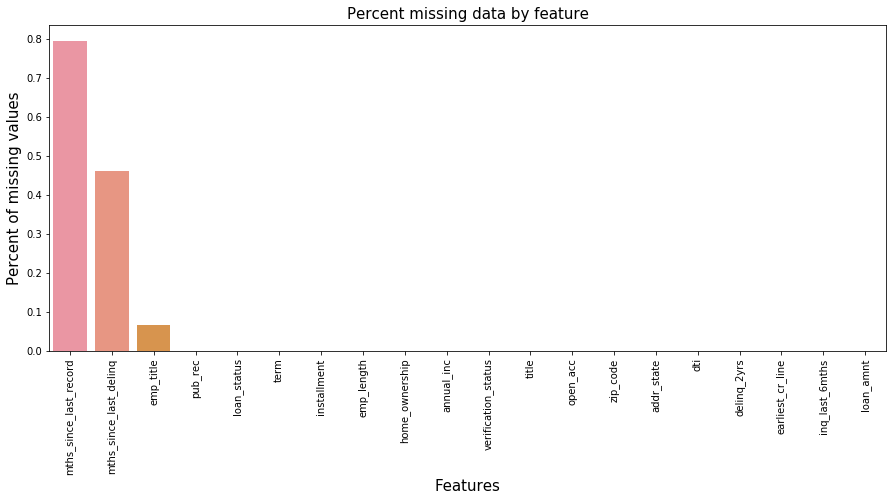

In [55]:
total = traindata.isnull().sum().sort_values(ascending=False)
percent = (traindata.isnull().sum()/traindata.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

In [56]:
traindata['loan_status'] = traindata['loan_status'].apply(
    lambda loan_status: 0 if (loan_status == "Current" or loan_status == "Fully Paid") else 1)

In [57]:
traindata= traindata.drop(['emp_title','zip_code','addr_state','earliest_cr_line'],1)

In [58]:
# One-hot encode the non-numeric columns
traindata = pd.get_dummies(traindata, drop_first=False,columns= ['home_ownership','verification_status', 'title'])
traindata

,loan_amnt,term,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,title_Credit card refinancing,title_Debt consolidation,title_Green loan,title_Home buying,title_Home improvement,title_Major purchase,title_Medical expenses,title_Moving and relocation,title_Other,title_Vacation
0,14400,60,291.92,9.0,135000.0,0,6.60,1,0,11.0,...,0,0,0,0,1,0,0,0,0,0
1,4500,36,151.06,6.0,32000.0,0,29.93,0,1,NaN,...,1,0,0,0,0,0,0,0,0,0
2,3600,36,118.53,11.0,89712.0,0,20.30,0,0,NaN,...,1,0,0,0,0,0,0,0,0,0
3,7000,36,210.81,2.0,85000.0,0,12.80,1,0,20.0,...,0,1,0,0,0,0,0,0,0,0
4,39000,36,1370.94,19.0,78000.0,0,33.14,0,0,NaN,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103509,16000,60,362.34,19.0,150000.0,0,12.25,0,0,68.0,...,0,0,0,0,0,0,1,0,0,0
103510,24000,60,515.74,4.0,125000.0,0,10.98,0,0,NaN,...,1,0,0,0,0,0,0,0,0,0
103511,24000,60,543.50,7.0,95000.0,0,19.61,0,0,NaN,...,0,0,0,0,1,0,0,0,0,0
103512,24000,60,515.74,19.0,108000.0,0,34.94,0,1,60.0,...,0,1,0,0,0,0,0,0,0,0


In [59]:
traindata.head()

,loan_amnt,term,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,title_Credit card refinancing,title_Debt consolidation,title_Green loan,title_Home buying,title_Home improvement,title_Major purchase,title_Medical expenses,title_Moving and relocation,title_Other,title_Vacation
0,14400,60,291.92,9.0,135000.0,0,6.60,1,0,11.0,...,0,0,0,0,1,0,0,0,0,0
1,4500,36,151.06,6.0,32000.0,0,29.93,0,1,NaN,...,1,0,0,0,0,0,0,0,0,0
2,3600,36,118.53,11.0,89712.0,0,20.30,0,0,NaN,...,1,0,0,0,0,0,0,0,0,0
3,7000,36,210.81,2.0,85000.0,0,12.80,1,0,20.0,...,0,1,0,0,0,0,0,0,0,0
4,39000,36,1370.94,19.0,78000.0,0,33.14,0,0,NaN,...,0,1,0,0,0,0,0,0,0,0


In [82]:
traindata['mths_since_last_delinq']=traindata['mths_since_last_delinq'].fillna(traindata['mths_since_last_delinq'].max())

In [83]:
traindata['mths_since_last_record']=traindata['mths_since_last_record'].fillna(traindata['mths_since_last_record'].mean())

In [84]:
traindata

,loan_amnt,term,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,title_Credit card refinancing,title_Debt consolidation,title_Green loan,title_Home buying,title_Home improvement,title_Major purchase,title_Medical expenses,title_Moving and relocation,title_Other,title_Vacation
0,14400,60,291.92,9.0,135000.0,0,6.60,1,0,11.00000,...,0,0,0,0,1,0,0,0,0,0
1,4500,36,151.06,6.0,32000.0,0,29.93,0,1,68.37841,...,1,0,0,0,0,0,0,0,0,0
2,3600,36,118.53,11.0,89712.0,0,20.30,0,0,68.37841,...,1,0,0,0,0,0,0,0,0,0
3,7000,36,210.81,2.0,85000.0,0,12.80,1,0,20.00000,...,0,1,0,0,0,0,0,0,0,0
4,39000,36,1370.94,19.0,78000.0,0,33.14,0,0,68.37841,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103509,16000,60,362.34,19.0,150000.0,0,12.25,0,0,68.00000,...,0,0,0,0,0,0,1,0,0,0
103510,24000,60,515.74,4.0,125000.0,0,10.98,0,0,68.37841,...,1,0,0,0,0,0,0,0,0,0
103511,24000,60,543.50,7.0,95000.0,0,19.61,0,0,68.37841,...,0,0,0,0,1,0,0,0,0,0
103512,24000,60,515.74,19.0,108000.0,0,34.94,0,1,60.00000,...,0,1,0,0,0,0,0,0,0,0


## Test dataset

In [85]:
testdata['term'] =testdata['term'].str.replace('months','')
testdata['term']= pd.to_numeric(testdata['term'], errors='coerce')
testdata['home_ownership'] =testdata['home_ownership'].replace('NONE','ANY')

AttributeError: Can only use .str accessor with string values!

In [64]:
testdata['loan_status'] = testdata['loan_status'].apply(
    lambda loan_status: 0 if (loan_status == "Current" or loan_status == "Fully Paid") else 1)

In [65]:
# One-hot encode the non-numeric columns
testdata = pd.get_dummies(testdata, drop_first=False,columns= ['home_ownership','verification_status', 'title'])


In [66]:
testdata= testdata.drop(['int_rate','emp_title','zip_code','addr_state','earliest_cr_line'],1)


In [86]:
testdata['mths_since_last_delinq']= testdata['mths_since_last_delinq'].fillna(
    testdata['mths_since_last_delinq'].max())

In [87]:
testdata['mths_since_last_record']=testdata['mths_since_last_record'].fillna(
    testdata['mths_since_last_record'].mean())

In [88]:
testdata

,loan_amnt,term,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,title_Credit card refinancing,title_Debt consolidation,title_Green loan,title_Home buying,title_Home improvement,title_Major purchase,title_Medical expenses,title_Moving and relocation,title_Other,title_Vacation
0,15000,36,451.73,16.0,182000.0,0,9.35,0,0,68.742866,...,0,1,0,0,0,0,0,0,0,0
1,17000,36,528.73,20.0,120000.0,0,8.41,0,0,72.000000,...,0,1,0,0,0,0,0,0,0,0
2,20000,36,602.30,3.0,120000.0,0,26.54,0,1,68.742866,...,1,0,0,0,0,0,0,0,0,0
3,16000,60,361.93,19.0,130000.0,0,8.28,0,0,42.000000,...,0,1,0,0,0,0,0,0,0,0
4,2000,36,71.30,6.0,62000.0,0,16.43,0,2,57.000000,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96740,10400,36,360.47,5.0,26000.0,0,18.56,0,0,68.742866,...,0,1,0,0,0,0,0,0,0,0
96741,15000,36,503.54,2.0,110500.0,0,4.95,0,2,68.742866,...,1,0,0,0,0,0,0,0,0,0
96742,10000,36,314.48,0.0,46203.0,0,17.04,0,0,38.000000,...,0,1,0,0,0,0,0,0,0,0
96743,6325,36,222.34,0.0,24564.0,0,21.38,2,0,15.000000,...,0,1,0,0,0,0,0,0,0,0


# Task 1

In [89]:
X_train = traindata.drop('loan_status', axis = 1)
y_train = traindata['loan_status']
X_test = testdata.drop('loan_status', axis = 1)
y_test = testdata['loan_status']

In [90]:
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

In [91]:
# Predict using the model
preds= clf_logistic.predict_proba(X_test)

In [92]:
preds

array([[0.96083639, 0.03916361],
       [0.95943651, 0.04056349],
       [0.9369184 , 0.0630816 ],
       ...,
       [0.89564477, 0.10435523],
       [0.87399611, 0.12600389],
       [0.88029623, 0.11970377]])

In [93]:
preds_df = pd.DataFrame(preds[:,1], columns = ['prob_default'])
print(pd.concat([y_test, preds_df], axis = 1))

       loan_status  prob_default
0                0      0.039164
1                0      0.040563
2                0      0.063082
3                0      0.034118
4                0      0.111782
...            ...           ...
96740            0      0.105268
96741            0      0.073096
96742            0      0.104355
96743            0      0.126004
96744            0      0.119704

[96745 rows x 2 columns]


In [94]:
clf_logistic.score(X_test,y_test)

0.9320171585094837

In [95]:
svm1 = svm.SVC(gamma='scale',probability = True)
svm1.fit(X_train,y_train)
y_pred = svm1.predict(X_test)
print('Accuracy Score: {}'.format(metrics.accuracy_score(y_test,y_pred)))
print('ROC AUC Score: {}'.format(metrics.roc_auc_score(y_test,y_pred)))

Accuracy Score: 0.9320378314124761
ROC AUC Score: 0.5


In [96]:
from sklearn.model_selection import cross_val_score
n_folds = 10
scores = cross_val_score(svm1, X_train, y_train, cv=n_folds, scoring='roc_auc', n_jobs=-1)

In [97]:
fold_names = list(range(n_folds))
fold_names.append('Average')

avg_score = scores.mean()
scores = list(scores)
scores.append(avg_score)
cv_score = pd.DataFrame({'Fold Index': fold_names, 'ROC AUC (Norm)':scores, })

cv_score

,Fold Index,ROC AUC (Norm)
0,0,0.536980
1,1,0.515144
2,2,0.486617
3,3,0.536426
4,4,0.538154
5,5,0.548174
6,6,0.533324
7,7,0.543634
8,8,0.513215
9,9,0.500896


In [98]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 50, random_state=10, verbose = 1, n_jobs = -1)

In [99]:
rf.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.2s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=10, verbose=1,
                       warm_start=False)

In [100]:
rf_pred = rf.predict_proba(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    1.0s finished


In [102]:
preds_df_1 = pd.DataFrame(rf_pred[:,1], columns = ['prob_default'])
print(pd.concat([y_test, preds_df_1], axis = 1))

       loan_status  prob_default
0                0          0.00
1                0          0.04
2                0          0.12
3                0          0.00
4                0          0.08
...            ...           ...
96740            0          0.14
96741            0          0.22
96742            0          0.02
96743            0          0.02
96744            0          0.32

[96745 rows x 2 columns]


## Task 2 

array([0, 0, 0, ..., 0, 0, 0])